# EDA and Visulizations

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [3]:
file_path = r"C:\Users\Baile\Documents\DSI 24\capstone\clean_weed.csv"
weed = pd.read_csv(file_path)

In [4]:
all_effects = weed['effects'].str.split(',').explode()
distinct_effects = set(effect.strip() for effect in all_effects)

In [5]:
distinct_effects

{'Aroused',
 'Calm',
 'Creative',
 'Energetic',
 'Energized',
 'Euphoric',
 'Focused',
 'Giggly',
 'Happy',
 'Hungry',
 'Relaxed',
 'Sleepy',
 'Social',
 'Talkative',
 'Tingly',
 'Uplifted'}

In [6]:
all_flavors = weed['flavor'].str.split(',').explode()
distinct_flavors = set(flavor.strip() for flavor in all_flavors)

In [7]:
distinct_flavors 

{'Ammonia',
 'Apple',
 'Apricot',
 'Berry',
 'Blue',
 'Blueberry',
 'Butter',
 'Cheese',
 'Chemical',
 'Chestnut',
 'Citrus',
 'Coffee',
 'Diesel',
 'Earthy',
 'Flowery',
 'Fresh',
 'Fruit',
 'Fruity',
 'Grape',
 'Grapefruit',
 'Herbal',
 'Honey',
 'Lavender',
 'Lemon',
 'Lime',
 'Mango',
 'Menthol',
 'Minty',
 'Nutty',
 'Orange',
 'Peach',
 'Pepper',
 'Pine',
 'Pineapple',
 'Plum',
 'Pungent',
 'Rose',
 'SPicy',
 'Sage',
 'Skunk',
 'Sour',
 'Spicy',
 'Strawberry',
 'Sweet',
 'Tar',
 'Tea',
 'Tobacco',
 'Tree',
 'Tropical',
 'Vanilla',
 'Violet',
 'Woody'}

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
weed.describe()

,rating
count,1000.000000
mean,4.456700
std,0.332424
min,2.800000
25%,4.300000
50%,4.500000
75%,4.700000
max,5.000000


In [10]:
weed.shape

(1000, 5)

### Looking at numeric vs categorical columns

In [9]:
numeric_columns = weed.select_dtypes(include=['number']).columns
categorical_columns = weed.select_dtypes(include=['object']).columns

In [10]:
print("Numeric Columns:")
print(numeric_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numeric Columns:
Index(['rating'], dtype='object')

Categorical Columns:
Index(['strain', 'type', 'effects', 'flavor'], dtype='object')


## Visulizations

In [11]:
import warnings
warnings.filterwarnings('ignore')

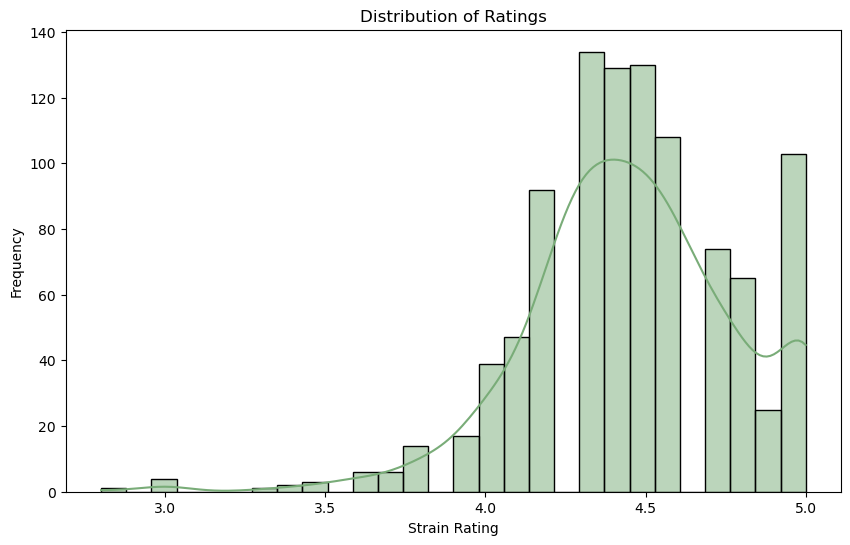

In [12]:
# Univariate Analysis for Ratings
custom_color = '#79AC78'
plt.figure(figsize=(10, 6))
sns.histplot(weed['rating'], kde=True, color=custom_color)
plt.title('Distribution of Ratings')
plt.xlabel('Strain Rating')
plt.ylabel('Frequency')
plt.show()

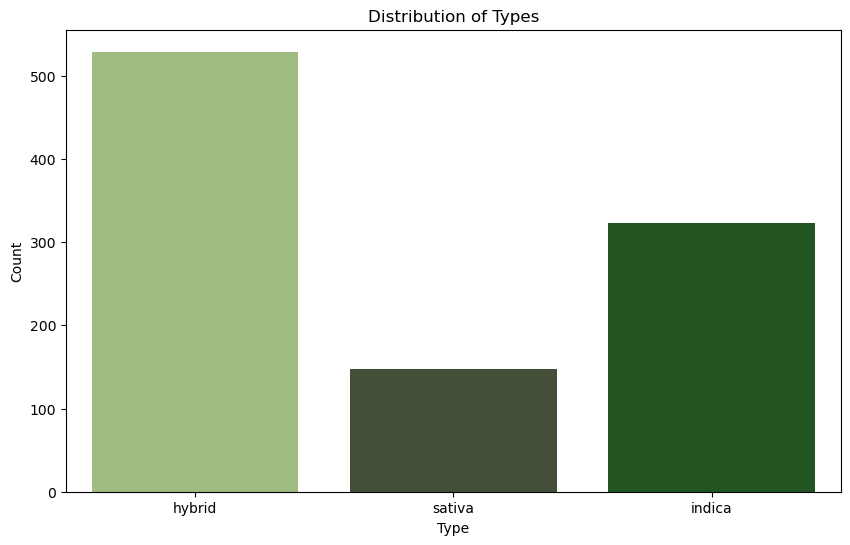

In [48]:
custom_palette = ['#A2C579', '#435334', '#1A5D1A', '#E7B10A']

plt.figure(figsize=(10, 6))
sns.countplot(data=weed, x='type', palette=custom_palette)
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

C:\Users\Baile\AppData\Local\Temp\ipykernel_22568\474872667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=weed['effects'].str.split(',').explode().str.strip(),
C:\Users\Baile\AppData\Local\Temp\ipykernel_22568\474872667.py:5: UserWarning: 
The palette list has fewer values (7) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=weed['effects'].str.split(',').explode().str.strip(),


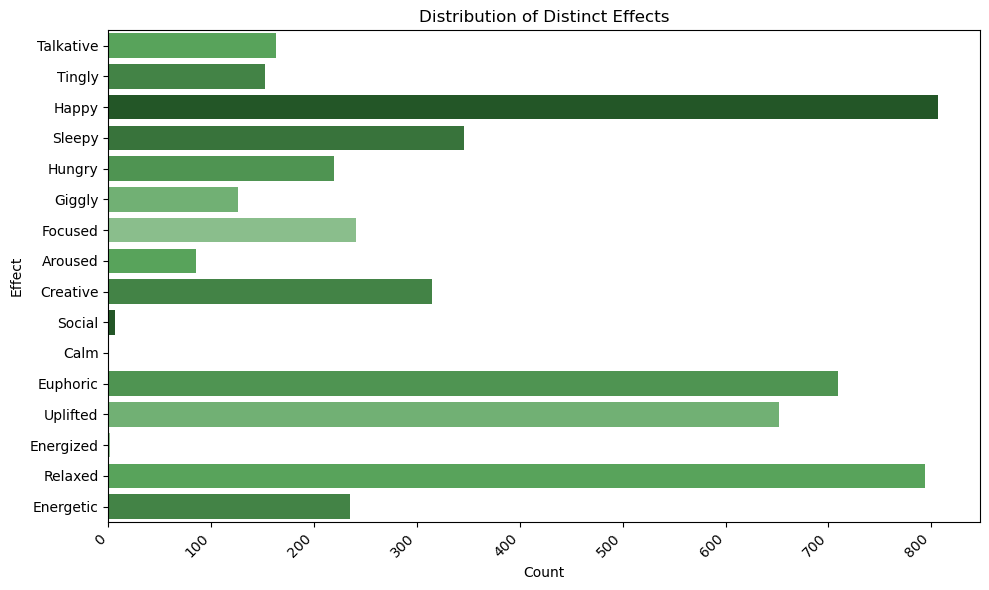

In [13]:
green_palette = sns.color_palette(['#4CAF50', '#388E3C', '#1B5E20', '#2E7D32', '#43A047', '#66BB6A', '#81C784'])

# Countplot for Distinct Effects 
plt.figure(figsize=(10, 6))
sns.countplot(data=weed['effects'].str.split(',').explode().str.strip(),
              order=distinct_effects, palette=green_palette)
plt.title('Distribution of Distinct Effects')
plt.xlabel('Count')
plt.ylabel('Effect')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

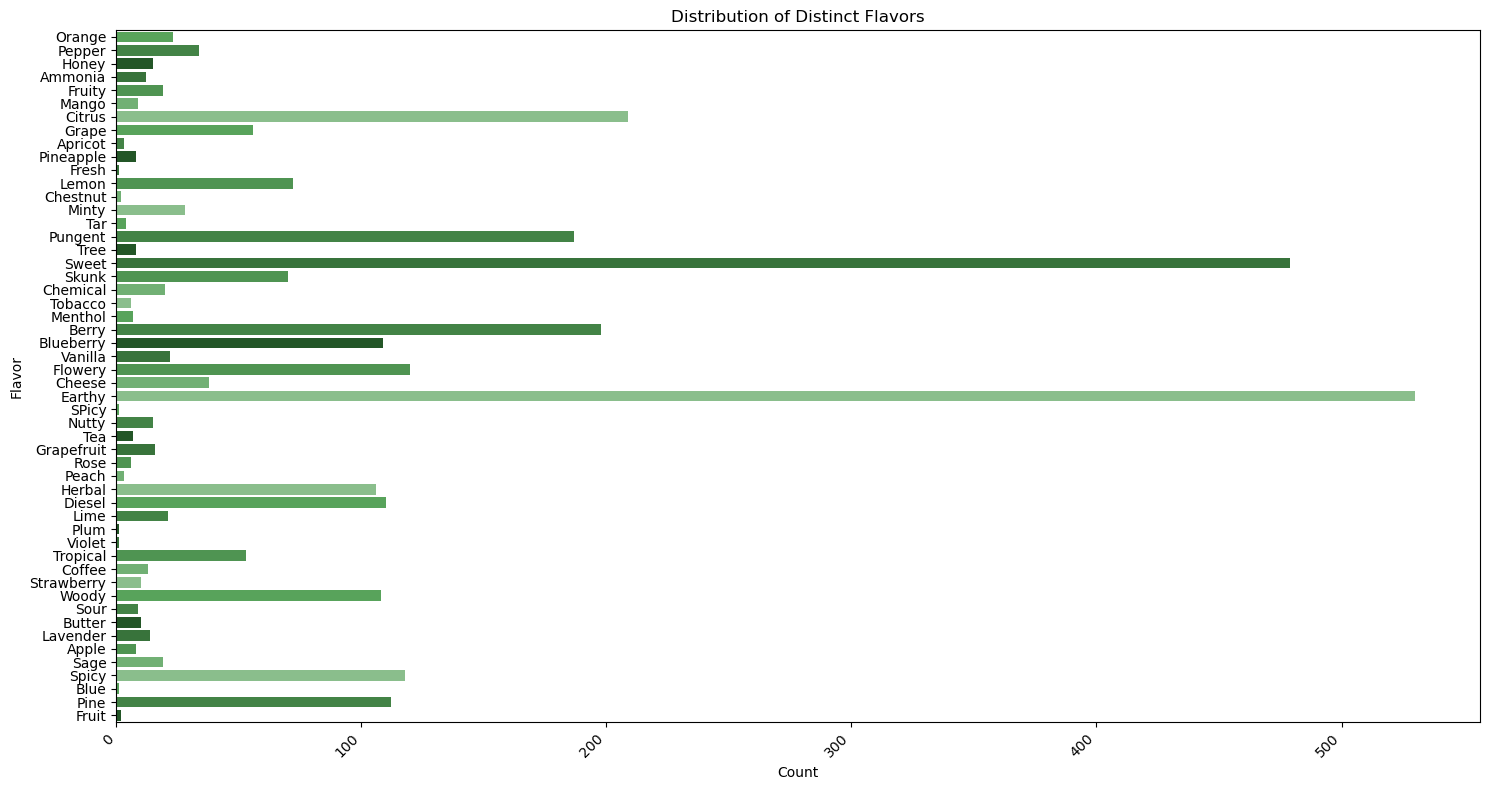

In [16]:
# Countplot for Distinct Flavors 
plt.figure(figsize=(15, 8))
sns.countplot(data=weed['flavor'].str.split(',').explode().str.strip(),
              order=distinct_flavors, palette=green_palette)
plt.title('Distribution of Distinct Flavors')
plt.xlabel('Count')
plt.ylabel('Flavor')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

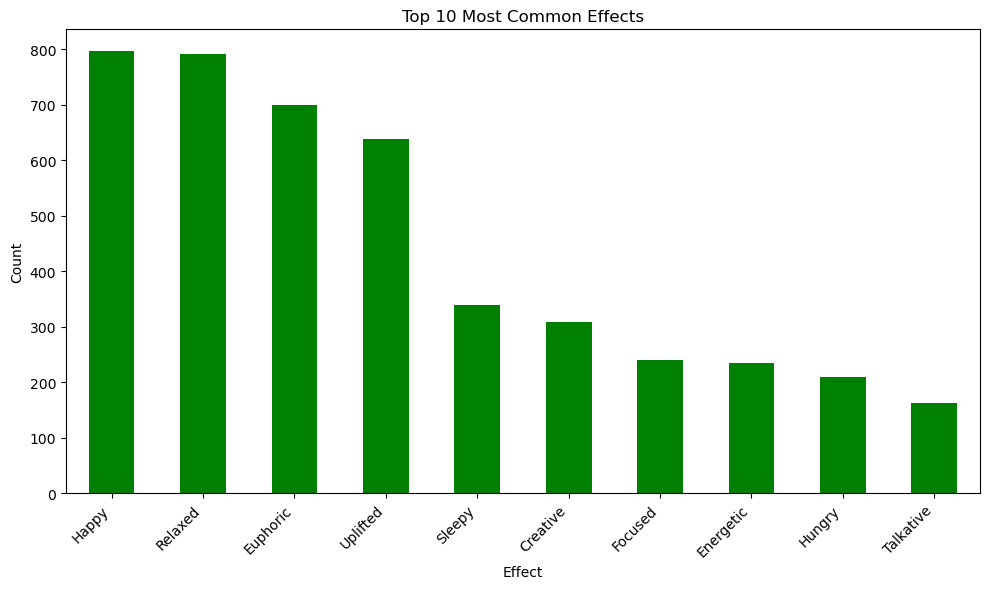

In [38]:
all_effects = weed['effects'].str.split(',').explode()
effect_counts = all_effects.value_counts()


top_n = 10
top_effects = effect_counts.head(top_n)


plt.figure(figsize=(10, 6))
top_effects.plot(kind='bar', color='green')
plt.title(f'Top {top_n} Most Common Effects')
plt.xlabel('Effect')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

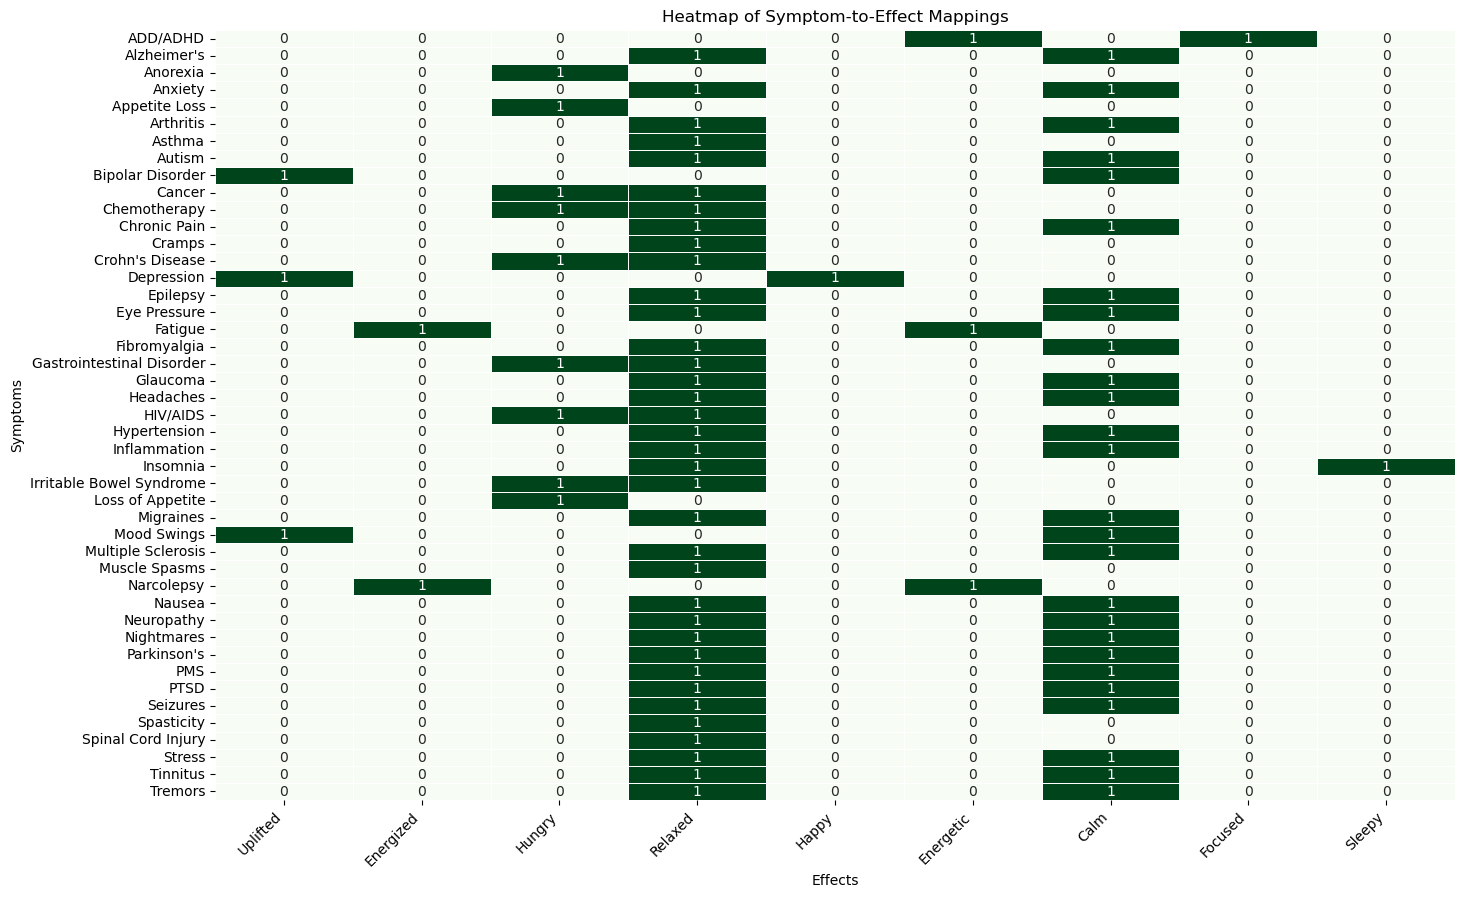

In [51]:
symptoms_to_effects = {
    'ADD/ADHD': ['Focused', 'Energetic'],
    'Alzheimer\'s': ['Relaxed', 'Calm'],
    'Anorexia': ['Hungry'],
    'Anxiety': ['Calm', 'Relaxed'],
    'Appetite Loss': ['Hungry'],
    'Arthritis': ['Relaxed', 'Calm'],
    'Asthma': ['Relaxed'],
    'Autism': ['Calm', 'Relaxed'],
    'Bipolar Disorder': ['Calm', 'Uplifted'],
    'Cancer': ['Relaxed', 'Hungry'],
    'Chemotherapy': ['Hungry', 'Relaxed'],
    'Chronic Pain': ['Relaxed', 'Calm'],
    'Cramps': ['Relaxed'],
    'Crohn\'s Disease': ['Relaxed', 'Hungry'],
    'Depression': ['Happy', 'Uplifted'],
    'Epilepsy': ['Calm', 'Relaxed'],
    'Eye Pressure': ['Calm', 'Relaxed'],
    'Fatigue': ['Energized', 'Energetic'],
    'Fibromyalgia': ['Relaxed', 'Calm'],
    'Gastrointestinal Disorder': ['Hungry', 'Relaxed'],
    'Glaucoma': ['Calm', 'Relaxed'],
    'Headaches': ['Relaxed', 'Calm'],
    'HIV/AIDS': ['Hungry', 'Relaxed'],
    'Hypertension': ['Calm', 'Relaxed'],
    'Inflammation': ['Calm', 'Relaxed'],
    'Insomnia': ['Sleepy', 'Relaxed'],
    'Irritable Bowel Syndrome': ['Hungry', 'Relaxed'],
    'Loss of Appetite': ['Hungry'],
    'Migraines': ['Relaxed', 'Calm'],
    'Mood Swings': ['Calm', 'Uplifted'],
    'Multiple Sclerosis': ['Relaxed', 'Calm'],
    'Muscle Spasms': ['Relaxed'],
    'Narcolepsy': ['Energetic', 'Energized'],
    'Nausea': ['Relaxed', 'Calm'],
    'Neuropathy': ['Calm', 'Relaxed'],
    'Nightmares': ['Calm', 'Relaxed'],
    'Parkinson\'s': ['Calm', 'Relaxed'],
    'PMS': ['Calm', 'Relaxed'],
    'PTSD': ['Calm', 'Relaxed'],
    'Seizures': ['Calm', 'Relaxed'],
    'Spasticity': ['Relaxed'],
    'Spinal Cord Injury': ['Relaxed'],
    'Stress': ['Calm', 'Relaxed'],
    'Tinnitus': ['Calm', 'Relaxed'],
    'Tremors': ['Calm', 'Relaxed']
}

# Get the list of all symptoms and effects
all_symptoms = list(symptoms_to_effects.keys())
all_effects = list({effect for effects in symptoms_to_effects.values() for effect in effects})

# Create a binary matrix for symptoms and effects
binary_matrix = pd.DataFrame(0, index=all_symptoms, columns=all_effects)

# Fill the binary matrix based on symptom_to_effects mapping
for symptom, effects in symptoms_to_effects.items():
    for effect in effects:
        binary_matrix.at[symptom, effect] = 1

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(binary_matrix, cmap='Greens', linewidths=0.5, annot=True, cbar=False)
plt.title('Heatmap of Symptom-to-Effect Mappings')
plt.xlabel('Effects')
plt.ylabel('Symptoms')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

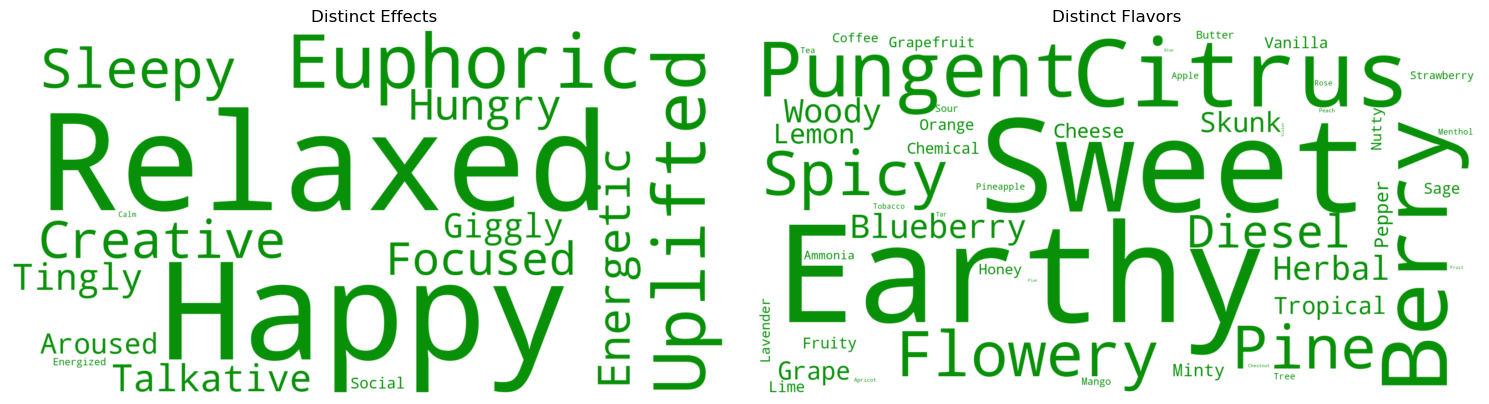

In [33]:
# frequency of each effect
all_effects = weed['effects'].str.split(',').explode().str.strip()
effects_freq = Counter(all_effects)

# frequency of each flavor
all_flavors = weed['flavor'].str.split(',').explode().str.strip()
flavors_freq = Counter(all_flavors)

def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(120, 90%, 30%)".format(40 + (font_size % 60))

# Create a word cloud for effects with the green color function
effect_wordcloud = WordCloud(
    width=800, height=400, background_color='white', colormap='tab20', max_words=50,
    scale=2, max_font_size=150, color_func=green_color_func
).generate_from_frequencies(effect_counts)

# Create a word cloud for flavors with the green color function
flavor_wordcloud = WordCloud(
    width=800, height=400, background_color='white', colormap='tab20', max_words=50,
    scale=2, max_font_size=150, color_func=green_color_func
).generate_from_frequencies(flavor_counts)

# Plot the word clouds
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.imshow(effect_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Distinct Effects')

plt.subplot(1, 2, 2)
plt.imshow(flavor_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Distinct Flavors')

plt.tight_layout()
plt.show()